In [113]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.graphics.gofplots import qqplot
sns.set()

df = pd.read_excel('db.xlsx')
df.head()

,Дата для смены,Месяц,Смена,Самосвал,"Avg-Вес по СКЗ, т","Sum-Расстояние, км","Avg-Средняя скорость, км/ч",Avg-Перепад высот,StDev-Перепад высот,"Расход топлива, л"
0,2022-10-01,10,1,1035,228.500000,25.99,17.731667,152.283333,66.851789,575.0
1,2022-10-01,10,1,1037,214.818182,80.42,17.938182,125.609091,48.356601,1795.0
2,2022-10-01,10,1,1039,221.533333,73.36,16.754000,179.664286,70.469738,1688.0
3,2022-10-01,10,1,1040,229.466667,94.95,16.555333,NaN,NaN,1865.0
4,2022-10-01,10,1,1042,NaN,60.46,NaN,77.514286,47.216396,1519.0


In [2]:
df.tail()

,Дата для смены,Месяц,Смена,Самосвал,"Avg-Вес по СКЗ, т","Sum-Расстояние, км","Avg-Средняя скорость, км/ч",Avg-Перепад высот,StDev-Перепад высот,"Расход топлива, л"
19052,2022-03-31,3,2,1499,213.125000,95.37,18.866875,130.162500,41.011882,1752.0
19053,2022-03-31,3,2,1502,211.866667,46.54,NaN,217.707692,99.846286,1302.0
19054,2022-03-31,3,2,1503,226.937500,82.54,16.953750,179.475000,70.083774,1775.0
19055,2022-03-31,3,2,1504,219.066667,93.79,20.134000,139.846667,18.230816,1636.0
19056,2022-03-31,3,2,1505,221.176471,53.45,NaN,229.346667,99.174693,1687.0


In [3]:
df.describe()

,Месяц,Смена,Самосвал,"Avg-Вес по СКЗ, т","Sum-Расстояние, км","Avg-Средняя скорость, км/ч",Avg-Перепад высот,StDev-Перепад высот,"Расход топлива, л"
count,19057.000000,19057.000000,19057.000000,17937.000000,18552.000000,18275.000000,17242.000000,18118.000000,18337.000000
mean,6.048696,1.499082,1332.006822,221.680695,81.245005,19.401021,114.328822,36.140689,1550.970333
std,3.085022,0.500012,196.299550,9.585327,18.486391,1.742872,62.489313,31.579008,327.096777
min,1.000000,1.000000,1035.000000,190.000000,20.010000,15.001667,-49.918182,0.000000,500.000000
25%,3.000000,1.000000,1044.000000,216.541667,72.390000,18.318582,79.455385,8.799751,1380.000000
50%,6.000000,1.000000,1385.000000,223.444444,84.570000,19.513448,119.026500,29.265572,1594.000000
75%,9.000000,2.000000,1493.000000,228.272727,94.170000,20.540000,154.990170,56.853116,1774.000000
max,11.000000,2.000000,1888.000000,249.562500,119.950000,24.975200,249.875000,320.915607,2486.000000


In [154]:
df.isnull().mean() * 100

Дата для смены                0.000000
Месяц                         0.000000
Смена                         0.000000
Самосвал                      0.000000
Avg-Вес по СКЗ, т             5.877106
Sum-Расстояние, км            2.649945
Avg-Средняя скорость, км/ч    4.103479
Avg-Перепад высот             9.524059
StDev-Перепад высот           4.927323
Расход топлива, л             3.778139
dtype: float64

<Axes: >

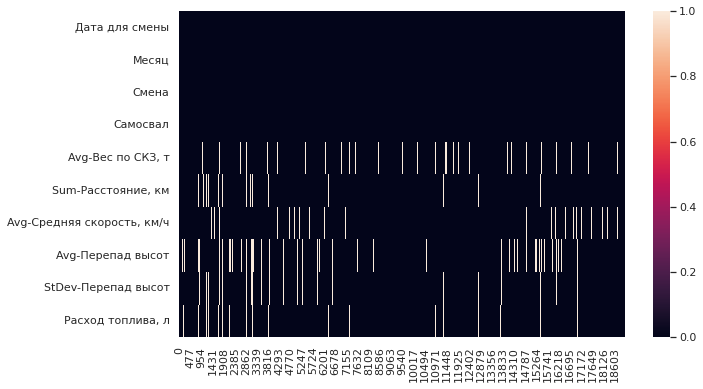

In [5]:
#визуализируем пропуски
# x - строки
plt.figure(figsize=(10, 6))
sns.heatmap(df.isna().transpose())

In [6]:
хочу проверить нормальность распределения переменных: 
- Средний вес в кузове автомобиля Белаз за смену
- Пройденное расстояние за смену
- Средняя скорость за смену
- Потраченный объем топлива за смену

Нулевая гипотеза - данные распределены нормально.

SyntaxError: invalid syntax (1211165119.py, line 1)

Количество наблюдений 17937


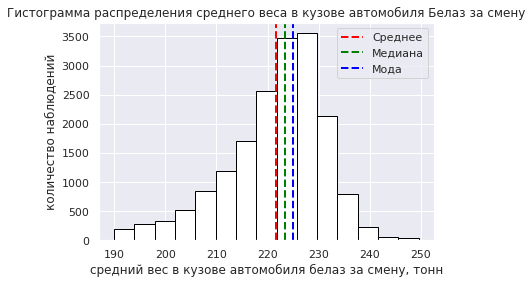

In [155]:
avg_weight = df['Avg-Вес по СКЗ, т'].dropna()
print(f'Количество наблюдений {avg_weight.count()}')
# 17937 строк с данными


plt.hist(avg_weight, bins=15, edgecolor='black', color='#E6E6FA', facecolor='white')

plt.xlabel('средний вес в кузове автомобиля белаз за смену, тонн')
plt.ylabel('количество наблюдений')
plt.title('Гистограмма распределения среднего веса в кузове автомобиля Белаз за смену')
plt.axvline(avg_weight.mean(), color='red', linestyle='dashed', linewidth=2, label='Среднее')
plt.axvline(avg_weight.median(), color='green', linestyle='dashed', linewidth=2, label='Медиана')
plt.axvline(avg_weight.mode().iloc[0], color='blue', linestyle='dashed', linewidth=2, label='Мода')
plt.legend()

plt.savefig('/home/anya-mankova/emco/images/avg_weight/aw_hist.png', dpi=100)
plt.show()

In [156]:
print("Дисперсия: ", np.var(avg_weight))
print("Стандартное отклонение: ", np.std(avg_weight))
print("Коэффициент вариации: ", avg_weight.std() / avg_weight.mean())
print("Межквартильный размах: ", avg_weight.quantile(0.75) - avg_weight.quantile(0.25))
print()

#тест Шапиро=Уилка не подходит, поскольку выборка более 5000

#тест Лиллиефорса
test_stat, p_value = lilliefors(avg_weight, dist='norm')
print(f'Тест Лиллиефорса: критерий = {round(test_stat, 3)}, p-val = {round(p_value, 3)}')

Дисперсия:  91.87336801886252
Стандартное отклонение:  9.58505962521165
Коэффициент вариации:  0.04323933938485486
Межквартильный размах:  11.731060606059998

Тест Лиллиефорса: критерий = 0.079, p-val = 0.001


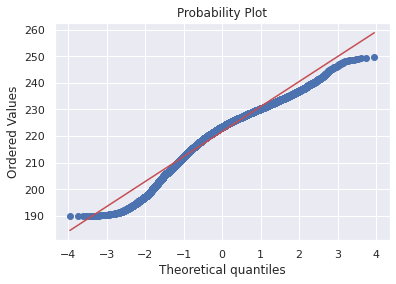

In [157]:
stats.probplot(avg_weight, dist="norm", plot=plt)
plt.savefig('/home/anya-mankova/emco/images/avg_weight/aw_qqplot.png', dpi=100)
plt.show()

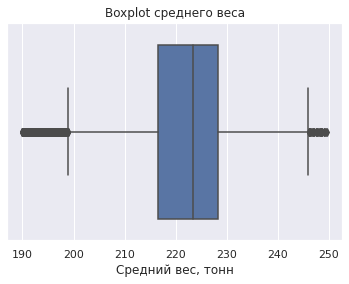

In [158]:
plt.figure(facecolor='white')
sns.boxplot(x=avg_weight)
plt.xlabel('Средний вес, тонн')
plt.title('Boxplot среднего веса')
plt.savefig('/home/anya-mankova/emco/images/avg_weight/aw_boxplot.png', dpi=100)
plt.show()

 Количество наблюдений 17242


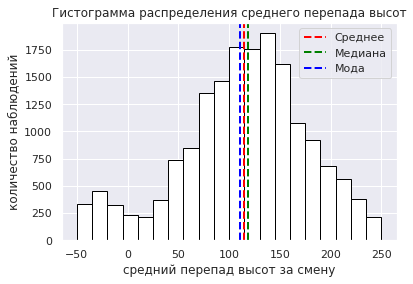

In [159]:
avg_height = df['Avg-Перепад высот'].dropna()
print(f' Количество наблюдений {avg_height.count()}')
# 17242 строк с данными
plt.hist(avg_height, bins=20, edgecolor='black', color='#E6E6FA', facecolor='white')

plt.xlabel('средний перепад высот за смену')
plt.ylabel('количество наблюдений')
plt.title('Гистограмма распределения среднего перепада высот')
plt.axvline(avg_height.mean(), color='red', linestyle='dashed', linewidth=2, label='Среднее')
plt.axvline(avg_height.median(), color='green', linestyle='dashed', linewidth=2, label='Медиана')
plt.axvline(avg_height.mode().iloc[0], color='blue', linestyle='dashed', linewidth=2, label='Мода')
plt.legend()

plt.savefig('/home/anya-mankova/emco/images/avg_height/ah_hist.png', dpi=100)
plt.show()

In [160]:
print("Дисперсия: ", np.var(avg_height))
print("Стандартное отклонение: ", np.std(avg_height))
print("Коэффициент вариации: ", avg_height.std() / avg_height.mean())
print("Межквартильный размах: ", avg_height.quantile(0.75) - avg_height.quantile(0.25))
print()

#тест Лиллиефорса
test_stat, p_value = lilliefors(avg_height, dist='norm')
print(f'Тест Лиллиефорса: критерий = {round(test_stat, 3)}, p-val = {round(p_value, 3)}')

Дисперсия:  3904.6878013730147
Стандартное отклонение:  62.48750116121635
Коэффициент вариации:  0.5465753265766312
Межквартильный размах:  75.53478566325285

Тест Лиллиефорса: критерий = 0.042, p-val = 0.001


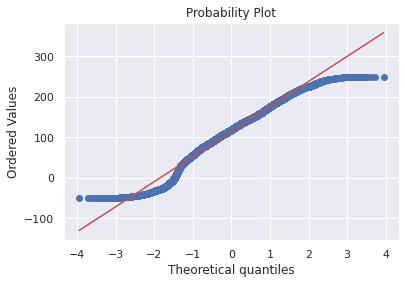

In [162]:
stats.probplot(avg_height, dist="norm", plot=plt)
plt.savefig('/home/anya-mankova/emco/images/avg_height/ah_qqplot.png', dpi=100)
plt.show()

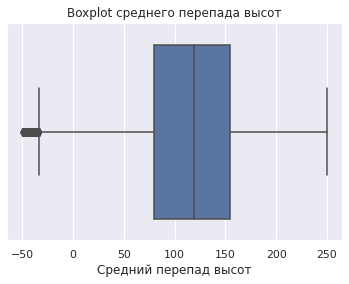

In [164]:
plt.figure(facecolor='white')
sns.boxplot(x=avg_height)
plt.xlabel('Средний перепад высот')
plt.title('Boxplot среднего перепада высот')
plt.savefig('/home/anya-mankova/emco/images/avg_height/ah_boxplot.png', dpi=100)
plt.show()

 Количество наблюдений 18552


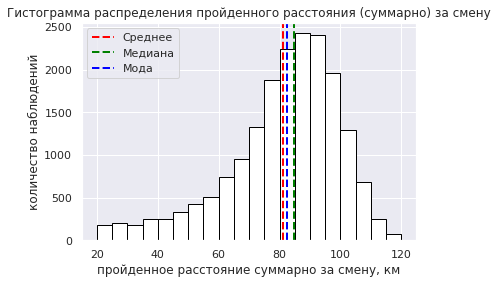

In [145]:
dist = df['Sum-Расстояние, км'].dropna()
print(f' Количество наблюдений {dist.count()}')
# 18552 строки с данными
plt.hist(dist, bins=20, edgecolor='black', color='#E6E6FA', facecolor='white')

plt.xlabel('пройденное расстояние суммарно за смену, км')
plt.ylabel('количество наблюдений')
plt.title('Гистограмма распределения пройденного расстояния (суммарно) за смену')
plt.axvline(dist.mean(), color='red', linestyle='dashed', linewidth=2, label='Среднее')
plt.axvline(dist.median(), color='green', linestyle='dashed', linewidth=2, label='Медиана')
plt.axvline(dist.mode().iloc[0], color='blue', linestyle='dashed', linewidth=2, label='Мода')
plt.legend()

plt.savefig('/home/anya-mankova/emco/images/dist/dist_hist.png', dpi=100)
plt.show()

In [165]:
print("Дисперсия: ", np.var(dist))
print("Стандартное отклонение: ", np.std(dist))
print("Коэффициент вариации: ", dist.std() / dist.mean())
print("Межквартильный размах: ", dist.quantile(0.75) - dist.quantile(0.25))
print()

#тест Лиллиефорса
test_stat, p_value = lilliefors(dist, dist='norm')
print(f'Тест Лиллиефорса: критерий = {round(test_stat, 3)}, p-val = {round(p_value, 3)}')

Дисперсия:  341.72823047647495
Стандартное отклонение:  18.48589274220953
Коэффициент вариации:  0.22753880087186099
Межквартильный размах:  21.78

Тест Лиллиефорса: критерий = 0.086, p-val = 0.001


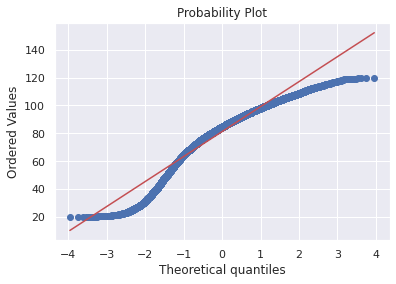

In [166]:
stats.probplot(dist, dist="norm", plot=plt)
plt.savefig('/home/anya-mankova/emco/images/dist/dist_qqplot.png', dpi=100)
plt.show()

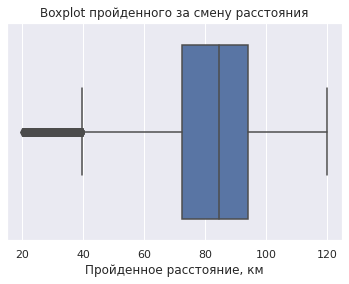

In [167]:
plt.figure(facecolor='white')
sns.boxplot(x=dist)
plt.xlabel('Пройденное расстояние, км')
plt.title('Boxplot пройденного за смену расстояния')
plt.savefig('/home/anya-mankova/emco/images/dist/dist_boxplot.png', dpi=100)
plt.show()

 Количество наблюдений 18275


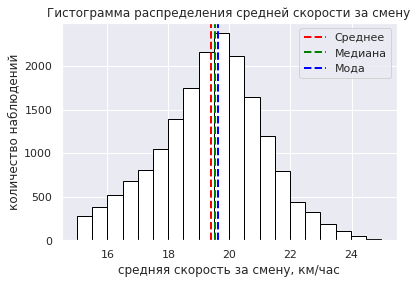

In [168]:
avg_speed = df['Avg-Средняя скорость, км/ч'].dropna()
print(f' Количество наблюдений {avg_speed.count()}')
# 18275 строк с данными
plt.hist(avg_speed, bins=20, edgecolor='black', color='#E6E6FA', facecolor='white')

plt.xlabel('средняя скорость за смену, км/час')
plt.ylabel('количество наблюдений')
plt.title('Гистограмма распределения средней скорости за смену')
plt.axvline(avg_speed.mean(), color='red', linestyle='dashed', linewidth=2, label='Среднее')
plt.axvline(avg_speed.median(), color='green', linestyle='dashed', linewidth=2, label='Медиана')
plt.axvline(avg_speed.mode().iloc[0], color='blue', linestyle='dashed', linewidth=2, label='Мода')
plt.legend()

plt.savefig('/home/anya-mankova/emco/images/avg_speed/as_hist.png', dpi=100)
plt.show()

In [169]:
print("Дисперсия: ", np.var(avg_speed))
print("Стандартное отклонение: ", np.std(avg_speed))
print("Коэффициент вариации: ", avg_speed.std() / avg_speed.mean())
print("Межквартильный размах: ", avg_speed.quantile(0.75) - avg_speed.quantile(0.25))
print()

#тест Лиллиефорса
test_stat, p_value = lilliefors(avg_speed, dist='norm')
print(f'Тест Лиллиефорса: критерий = {round(test_stat, 3)}, p-val = {round(p_value, 3)}')

Дисперсия:  3.0374371344486972
Стандартное отклонение:  1.7428244703494087
Коэффициент вариации:  0.08983404461678608
Межквартильный размах:  2.2214177489176983

Тест Лиллиефорса: критерий = 0.033, p-val = 0.001


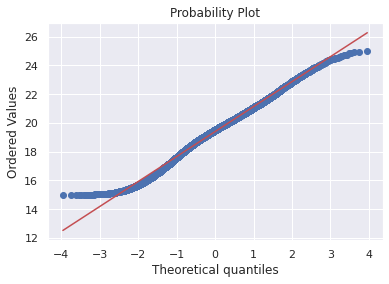

In [170]:
stats.probplot(avg_speed, dist="norm", plot=plt)
plt.savefig('/home/anya-mankova/emco/images/avg_speed/as_qqplot.png', dpi=100)
plt.show()

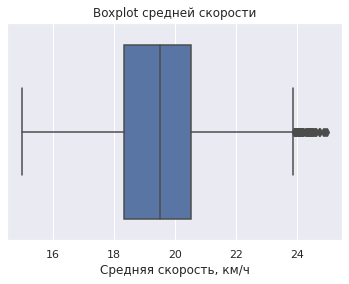

In [173]:
plt.figure(facecolor='white')
sns.boxplot(x=avg_speed)
plt.xlabel('Средняя скорость, км/ч')
plt.title('Boxplot средней скорости')
plt.savefig('/home/anya-mankova/emco/images/avg_speed/as_boxplot.png', dpi=100)
plt.show()

Количество наблюдений 18337


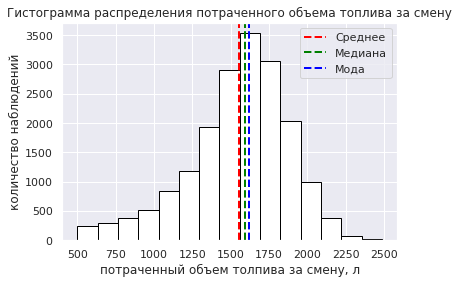

Все моды потраченного топлива: 1621.0, 1632.0, 1639.0


In [175]:
fuel = df['Расход топлива, л'].dropna()
print(f'Количество наблюдений {fuel.count()}')
# 18337 строк с данными
plt.hist(fuel, bins=15, edgecolor='black', color='#E6E6FA', facecolor='white')

plt.xlabel('потраченный объем толпива за смену, л')
plt.ylabel('количество наблюдений')
plt.title('Гистограмма распределения потраченного объема топлива за смену')
plt.axvline(fuel.mean(), color='red', linestyle='dashed', linewidth=2, label='Среднее')
plt.axvline(fuel.median(), color='green', linestyle='dashed', linewidth=2, label='Медиана')
plt.axvline(fuel.mode().iloc[0], color='blue', linestyle='dashed', linewidth=2, label='Мода')
plt.legend()

plt.savefig('/home/anya-mankova/emco/images/fuel/fuel_hist.png', dpi=100)
plt.show()

print(f'Все моды потраченного топлива: {", ".join(map(str, fuel.mode().tolist()))}')

In [179]:
print("Дисперсия: ", np.var(fuel))
print("Стандартное отклонение: ", np.std(fuel))
print("Коэффициент вариации: ", fuel.std() / fuel.mean())
print("Межквартильный размах: ", fuel.quantile(0.75) - fuel.quantile(0.25))
print()

#тест Лиллиефорса
test_stat, p_value = lilliefors(fuel, dist='norm')
print(f'Тест Лиллиефорса: критерий = {round(test_stat, 3)}, p-val = {round(p_value, 5)}')

Дисперсия:  106986.46691723098
Стандартное отклонение:  327.08785810120037
Коэффициент вариации:  0.21089815211618876
Межквартильный размах:  394.0

Тест Лиллиефорса: критерий = 0.066, p-val = 0.001


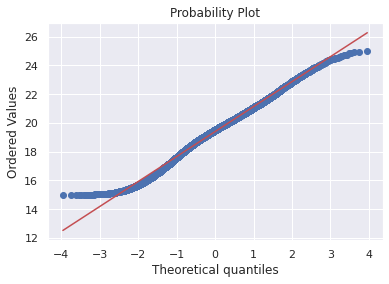

In [181]:
stats.probplot(avg_speed, dist="norm", plot=plt)
plt.savefig('/home/anya-mankova/emco/images/fuel/fuel_qqplot.png', dpi=100)
plt.show()

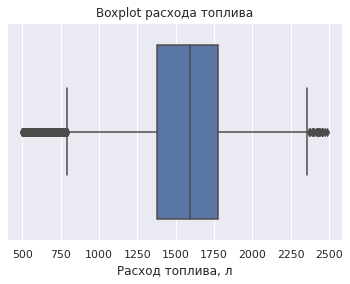

In [180]:
plt.figure(facecolor='white')
sns.boxplot(x=fuel)
plt.xlabel('Расход топлива, л')
plt.title('Boxplot расхода топлива')

plt.savefig('/home/anya-mankova/emco/images/fuel/fuel_boxplot.png', dpi=100)
plt.show()

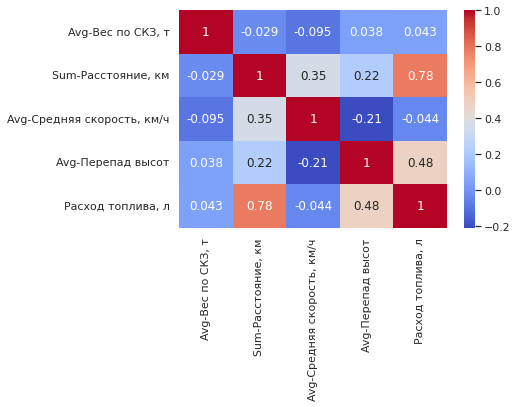

In [183]:
corr = df[['Avg-Вес по СКЗ, т', 'Sum-Расстояние, км', 'Avg-Средняя скорость, км/ч', 'Avg-Перепад высот', 'Расход топлива, л']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.savefig('/home/anya-mankova/emco/images/corr.png', dpi=100)

<Axes: xlabel='Расход топлива, л', ylabel='Avg-Перепад высот'>

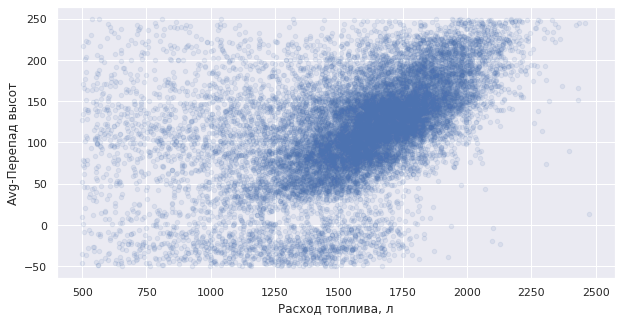

In [37]:
df.plot(x='Расход топлива, л', y='Avg-Перепад высот', kind='scatter', alpha=0.1, figsize=[10,5])